# Temperature Fluctuations within Rooms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

First, we calculate the relationship between temperature fluctuations in an infinite half-space and the corresponding heat flux density. The following applies:

```{math}
:label: T
  \vartheta(x, t) = \Delta \vartheta_0 \, \text{e}^{-\frac{x}{\sigma}} \, \text{cos}(\omega t - \frac{x}{\sigma})
```

With Fourier's law 

$$
    q(x, t) = - \lambda \frac{d \vartheta(x, t)}{dx}
$$

equation {eq}`T` becomes

```{math}
:label: q
  q(x, t) = \Delta \vartheta_0 \, b \ \sqrt{\omega} \text{e}^{-\frac{x}{\sigma}} \, \text{cos}(\omega t - \frac{x}{\sigma} + \frac{\pi}{4})
```
The flux density precedes the temperature changes by $\pi$/4. Something similar is already known from the relationship between current and voltage on a capacitor in electrical engineering.

For further considerations, we only need the flux densities at the surfaces. To simplify things further, we go into the complex number space. The treatment of phase shifts and amplitudes as well as their superpositions is much easier. Note, however, that only the real part is of physical significance.

```{math}
:label: q0
  q_0(t) = \Delta \vartheta_0 \, b \ \sqrt{\omega} \, \text{e}^{i(\omega t  + \frac{\pi}{4})}
```

We use the following figure to calculate now the temperature fluctuations due to a heat flow density $q$ via a thermal resistor into the infinite half-space. Although this is a very simple way of obtaining an analytical solution for calculating the room temperature amplitude, the components under consideration should ideally be 2 to 3 penetration depths thick.

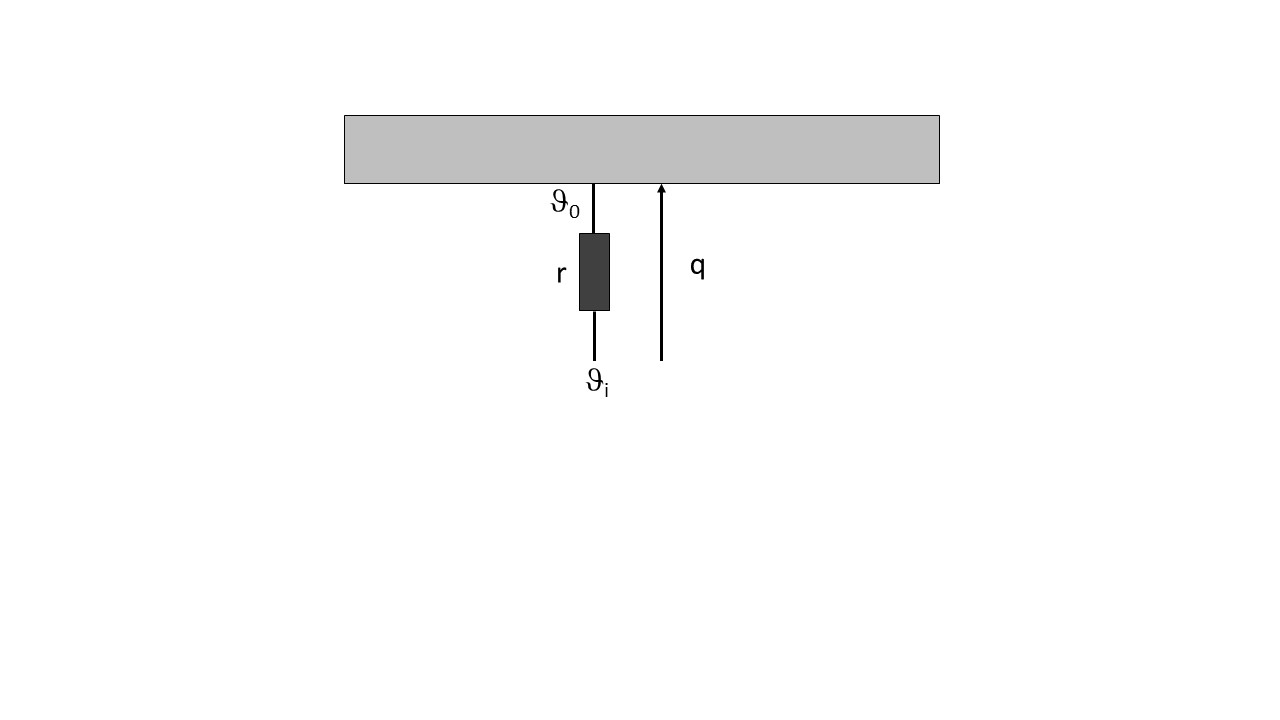

In [48]:
from IPython.display import Image
Image("UHR_1.jpg")

The following equations are valid
$$ \label{q1}
    q = \frac{1}{r}\, (\vartheta_i - \vartheta_0) \\
$$
$$
    q = \Delta \vartheta_0 \, b \ \sqrt{\omega} \, \text{e}^{i(\omega t  + \frac{\pi}{4})}
$$

with $q(t) = \Delta q \, \text{e}^{i\omega t}$ and $\vartheta_i(t) = \Delta \vartheta_i \, \text{e}^{i(\omega t + \varphi)}$ we get

$$
   \Delta \vartheta_i = \Delta q_0 \,| r + \frac{\text{e}^{-i \frac{\pi}{4}}}{b \sqrt{\omega}} |
$$   
and
$$
\varphi = - \text{arctan}(\frac{\frac{1}{2}\frac{\sqrt{2}}{b \sqrt{\omega}}} {r + \frac{1}{2} \frac{\sqrt{2}}{b \sqrt{\omega}}})
$$


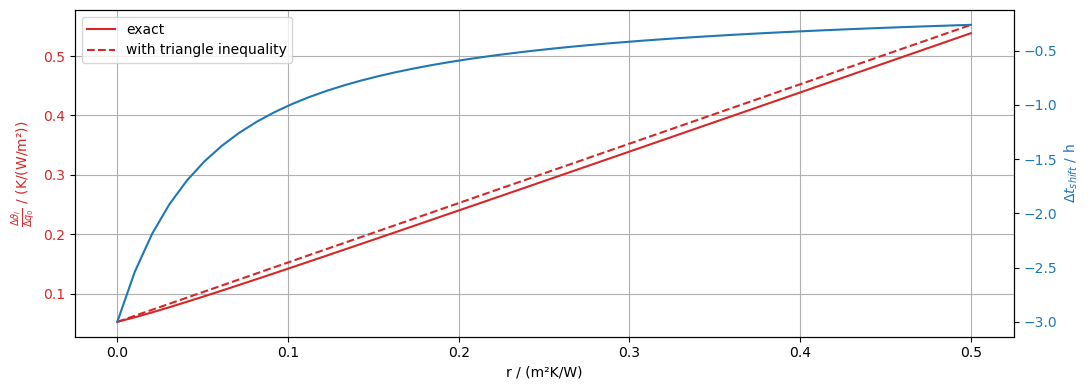

In [80]:
# The following plot shows results for increasing r

r    = np.linspace(0, 0.5, 50)
w    = 2*np.pi / 24 / 3600
b    = (2*2500*1000)**0.5    # thermal diffusivity for concrete
dq   = 1 # W/m²
dT_i = dq * abs(r + np.exp(-1j * np.pi/4) / b / w**0.5)
dT_max = dq * (r + 1 / b / w**0.5) # via triangle inequality
phi  = - np.arctan(0.5 * 2**0.5 / b / w**0.5 / (r + 0.5 * 2**0.5 / b / w**0.5)) * 24 / (2*np.pi)

fig, ax1 = plt.subplots(figsize=(11, 4))

color = 'tab:red'
ax1.set_xlabel('r / (m²K/W)')
ax1.set_ylabel(r'$\frac{\Delta \vartheta_i}{\Delta q_0}$ / (K/(W/m²))', color=color)
ax1.plot(r, dT_i, color=color, label='exact')
ax1.plot(r, dT_max, color=color, linestyle='dashed', label='with triangle inequality')
ax1.legend()
ax1.grid()
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r'$\Delta t_{shift}$ / h', color=color)  # we already handled the x-label with ax1
ax2.plot(r, phi, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.grid()
plt.show()

## Two infinite half-spaces

To treat two infinite half-spaces, which is closer to reality, we use the following thermal equivalent circuit diagram.
The total heat input released into the room is $\phi_1 + \phi_2 = \phi$.

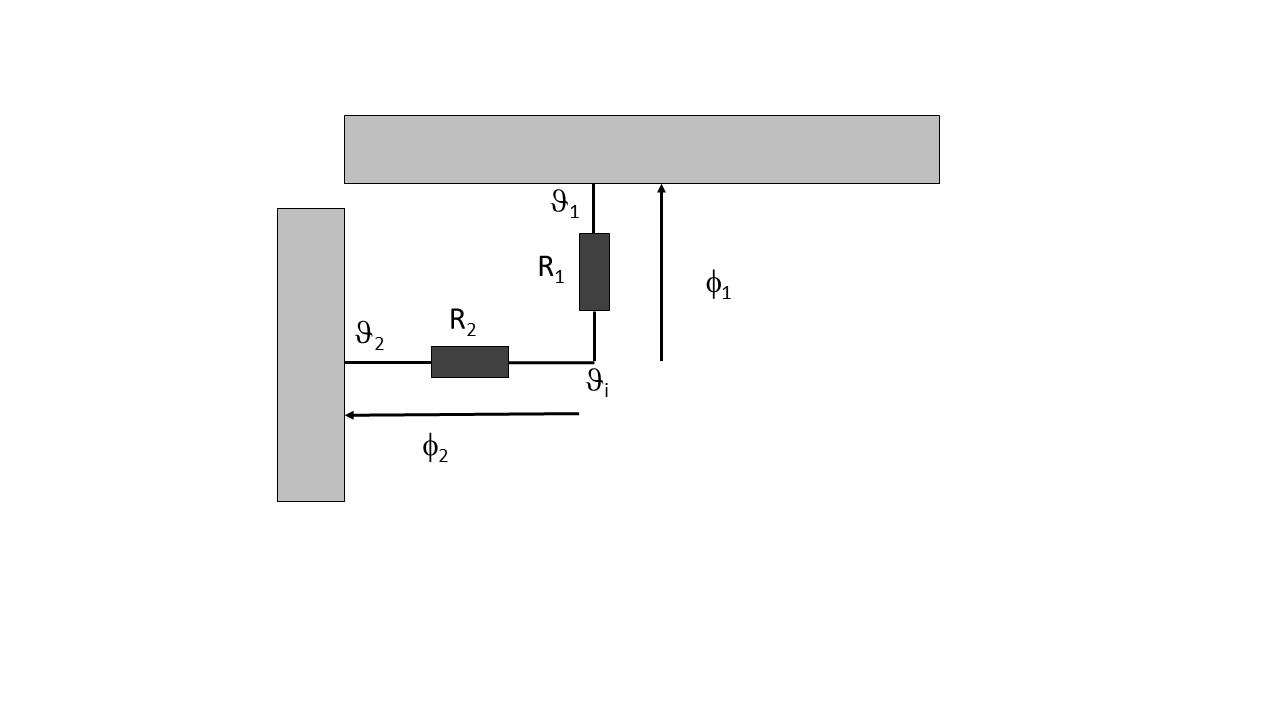

In [72]:
Image("UHR_2.jpg")

The procedure is similar to the first model and is left to the interested reader. We had it in the lecture. The result can also be found in the hidden cell.

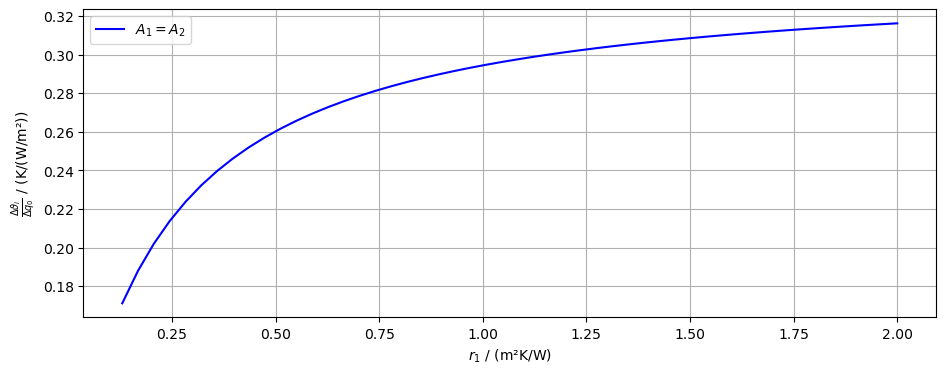

In [87]:
A1 = 20      # area half-space 1
A2 = 20      # area half space 2
b1 = (2 * 2500 * 1000)**0.5 # thermal diffusivities, concrete
b2 = b1
w  = 2*np.pi / 24 / 3600

r1 = np.linspace(0.13, 2, 50)  # thermal resistance per m² to take acoustic absorbers into account
R1 = r1 / A1                   # total resitance
r2 = 0.13                      # thermal resistance without any insulating material (convection and radiation only)
R2 = r2 / A2

z1 = 1 / (R1 + np.exp(-1j*np.pi/4) / A1 / b1 / w**0.5)
z2 = 1 / (R2 + np.exp(-1j*np.pi/4) / A2 / b2 / w**0.5)
z3 = z1 + z2

dq   = 1
dPhi = dq * (A1 + A2)  # total amplitude of heat power

dT_ii = dPhi / np.abs(z3)

fig = plt.figure(figsize=(11, 4))
plt.plot(r1, dT_ii/dq, 'b-', label='$A_1 = A_2$')
plt.xlabel('$r_1$ / (m²K/W)')
plt.ylabel(r'$\frac{\Delta \vartheta_i}{\Delta q_0}$ / (K/(W/m²))')
plt.legend()
plt.grid()
plt.show()

```{note}
Use the rocket button to change material properties and area sizes if necessary!
```

```{admonition} Questions
:class: full-width

- given a 20 m² office space in which 2 people are working on computers. The concrete ceiling is the only solid component. The solar input during the day is around 500 W/m². Estimate the resulting temperature amplitudes using the first model.

- the room is now being fitted with acoustic absorbers (approx. 10 cm thick). For this purpose, 50% of the ceiling surface will also be covered with these. What temperature amplitudes will result now?

- the components do not fulfil the half-space condition. How does this affect the results?

Hint: The exercises can be solved with the help of the diagrams above.

Also try to recapitulate the theory discussed in the lecture.
```